In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00


In [ ]:
# Import the required libraries
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()

# Number of records to generate
n = 1000

# Asset Types for a mall
asset_types = ['Escalator', 'Elevator', 'Kiosk', 'Water Fountain', 'ATM', 'Automatic Door', 'Information Board', 'Vending Machine']

# Manufacturers
manufacturers = ['Manufacturer_A', 'Manufacturer_B', 'Manufacturer_C', 'Manufacturer_D']

# Floors
floors = list(range(1, 6))

# Zones (now representing mall zones or areas)
zones = ['Fashion', 'Electronics', 'Food Court', 'Parking', 'Entertainment']

# Create an empty DataFrame to store the asset data
df = pd.DataFrame(columns=['Asset ID', 'Asset Type', 'Floor', 'Zone', 'Installation Date', 'Manufacturer', 'Operational Time (hrs)', 'Work Orders', 'Repairs', 'Last Serviced Date', 'Failure Probability'])

# Populate the DataFrame with simulated data
for i in range(1, n + 1):
    asset_id = i
    asset_type = random.choice(asset_types)
    floor = random.choice(floors)
    zone = random.choice(zones)
    installation_date = fake.date_between(start_date='-5y', end_date='today')
    manufacturer = random.choice(manufacturers)
    operational_time = random.randint(100, 10000)  # Adjusted operational time for mall assets
    work_orders = random.randint(0, 40)
    repairs = random.randint(0, 15)
    last_serviced_date = fake.date_between(start_date=installation_date, end_date='today')

    # Calculating failure probability
    failure_probability = round((repairs + work_orders) / operational_time, 5)
    # Ensure failure_probability stays below 1
    failure_probability = min(failure_probability, 0.99999)

    df.loc[i - 1] = [asset_id, asset_type, floor, zone, installation_date, manufacturer, operational_time, work_orders, repairs, last_serviced_date, failure_probability]

# Save the DataFrame to a CSV file
df.to_csv('mall_assets.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


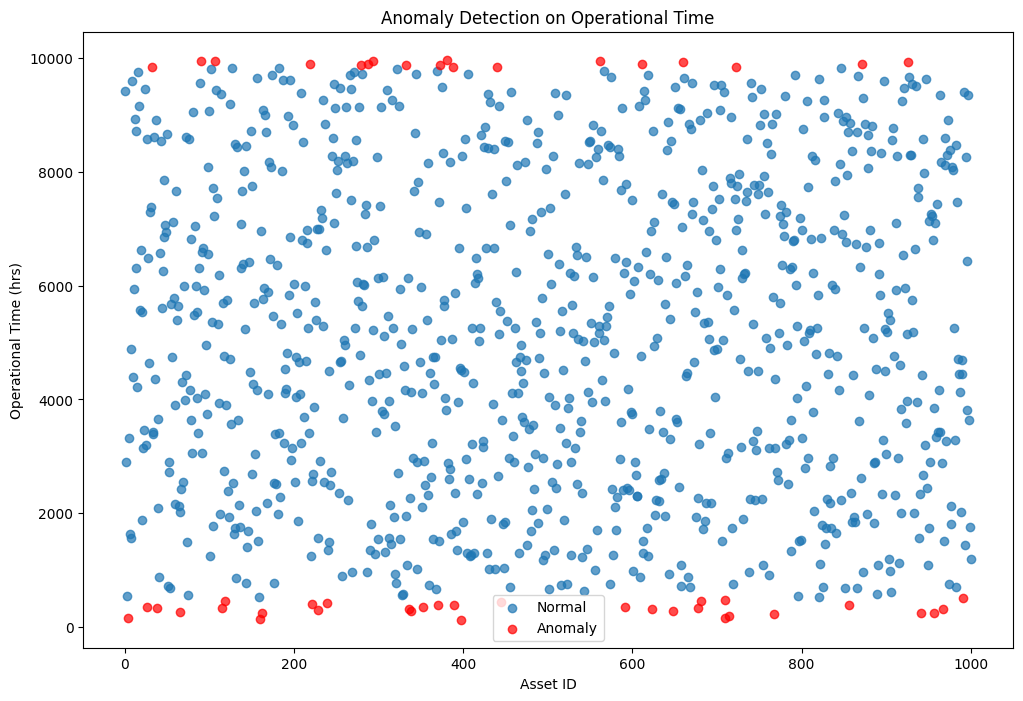

Anomalies in Operational Time:
     Asset ID  Operational Time (hrs)         Asset Type
3           4                     158          Escalator
26         27                     348                ATM
31         32                    9840              Kiosk
37         38                     323           Elevator
65         66                     260     Automatic Door
89         90                    9955          Escalator
106       107                    9952    Vending Machine
114       115                     333              Kiosk
118       119                     454                ATM
159       160                     142  Information Board
161       162                     250  Information Board
218       219                    9896          Escalator
221       222                     407     Automatic Door
228       229                     293    Vending Machine
238       239                     423           Elevator
278       279                    9877    Vending Machine


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Read the generated CSV file into a DataFrame
df = pd.read_csv('mall_assets.csv')

# Using Isolation Forest for anomaly detection on 'Operational Time (hrs)'
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05)
df['Anomaly_OperationalTime'] = isolation_forest.fit_predict(df[['Operational Time (hrs)']])

# Separate the anomalies from the normal data
anomalies = df[df['Anomaly_OperationalTime'] == -1]
normal = df[df['Anomaly_OperationalTime'] == 1]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(normal['Asset ID'], normal['Operational Time (hrs)'], label='Normal', alpha=0.7)
plt.scatter(anomalies['Asset ID'], anomalies['Operational Time (hrs)'], label='Anomaly', c='r', alpha=0.7)
plt.xlabel('Asset ID')
plt.ylabel('Operational Time (hrs)')
plt.title('Anomaly Detection on Operational Time')
plt.legend()
plt.show()

# Display anomalies
print("Anomalies in Operational Time:")
print(anomalies[['Asset ID', 'Operational Time (hrs)', 'Asset Type']])


                                 SARIMAX Results                                  
Dep. Variable:     Operational Time (hrs)   No. Observations:                 1000
Model:                     ARIMA(5, 1, 0)   Log Likelihood               -9430.434
Date:                    Sun, 17 Sep 2023   AIC                          18872.869
Time:                            07:31:52   BIC                          18902.309
Sample:                                 0   HQIC                         18884.059
                                   - 1000                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8354      0.032    -26.080      0.000      -0.898      -0.773
ar.L2         -0.7007      0.041    -16.907      0.000      -0.782      -0.619
ar.L3         -0.511

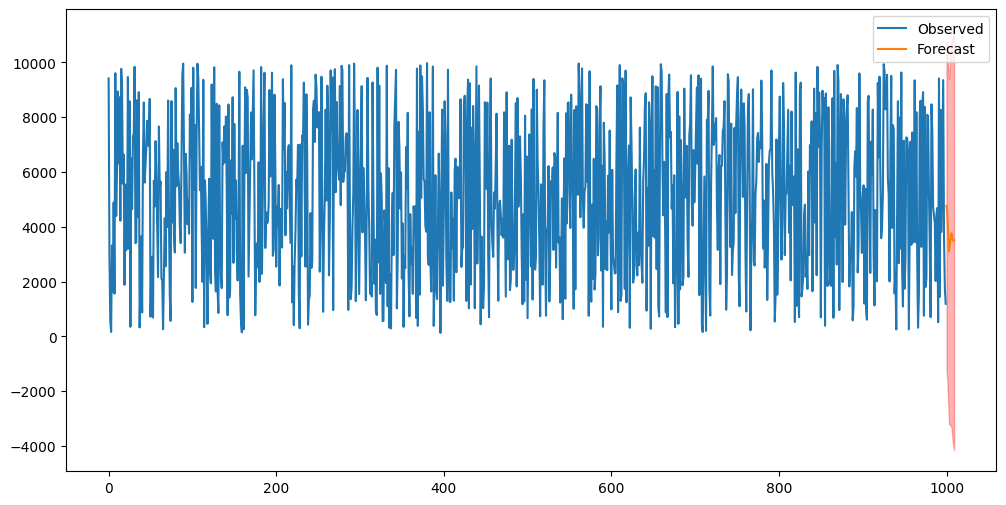

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Create a time series from operational time data
time_series_data = df['Operational Time (hrs)']

# Fit the new ARIMA model
model = ARIMA(time_series_data, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make sure to import matplotlib.pyplot
import matplotlib.pyplot as plt

# Make forecast
future_steps = 10  # Number of steps to predict into the future
forecast_obj = model_fit.get_forecast(steps=future_steps)
forecast = forecast_obj.predicted_mean
stderr = forecast_obj.se_mean
conf_int = forecast_obj.conf_int(alpha=0.05)  # 95% conf

# Generate a new index for the forecast period
new_index = range(len(time_series_data), len(time_series_data) + future_steps)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data, label='Observed')
plt.plot(new_index, forecast, label='Forecast')
plt.fill_between(new_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='r', alpha=0.3)
plt.legend()
plt.show()



In [ ]:
import pandas as pd

df = pd.read_csv('mall_assets.csv')

X = df[['Operational Time (hrs)', 'Repairs']]

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Recheck the condition you use to define 'y'.
# For example, you can print out the value counts to see the distribution.
print((df['Repairs'] > 5).value_counts())

# If the condition isn't providing a mix of True and False values,
# consider changing the threshold or using a different condition.
y = df['Repairs'] > 2

# Then you can proceed to fit the model as before:
model.fit(X, y)

# Add the prediction to the DataFrame
df['Failure_Probability'] = model.predict_proba(X)[:, 1]

# Add a 'Predicted_Failure_Next_Month' column
threshold = 0.8
df['Predicted_Failure_Next_Month'] = (df['Failure_Probability'] > threshold).astype(int)

# Save to new CSV
df.to_csv('mall_assets_with_predictions.csv', index=False)


False    1000
Name: Repairs, dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv('mall_assets_with_predictions.csv')
column_name = 'Predicted_Failure_Next_Month'

count_1 = (df[column_name] == 1).sum()
count_0 = (df[column_name] == 0).sum()

print(f"Count of 1's in {column_name}: {count_1}")
print(f"Count of 0's in {column_name}: {count_0}")

Count of 1's in Predicted_Failure_Next_Month: 484
Count of 0's in Predicted_Failure_Next_Month: 516


Average Failure Prediction by Asset Type: Asset Type
Water Fountain       0.001769
Information Board    0.002026
Automatic Door       0.002047
Vending Machine      0.002394
ATM                  0.002697
Kiosk                0.003276
Elevator             0.003487
Escalator            0.004692
Name: Predicted_Failure_Next_Month, dtype: float64


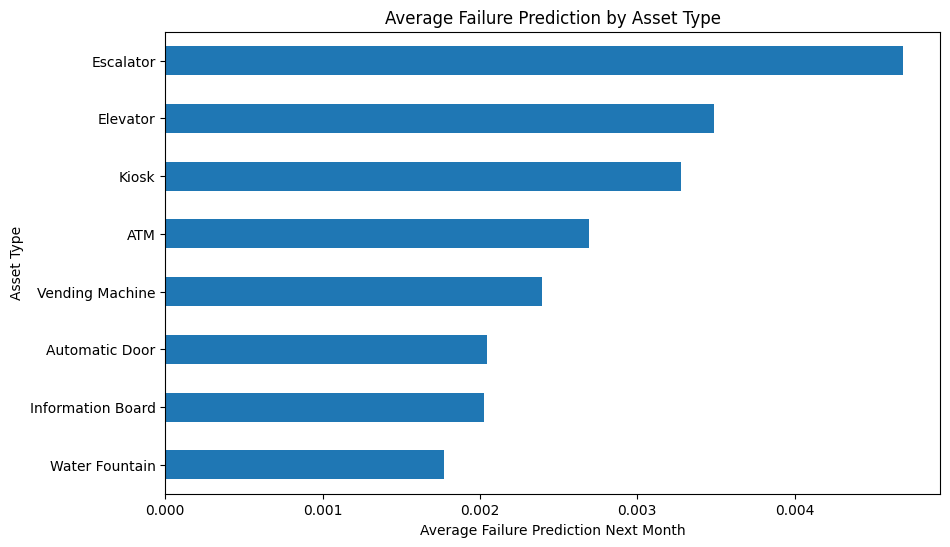

Average Failure Prediction by Manufacturer: Manufacturer
Manufacturer_C    0.002665
Manufacturer_A    0.002666
Manufacturer_B    0.002798
Manufacturer_D    0.002895
Name: Predicted_Failure_Next_Month, dtype: float64


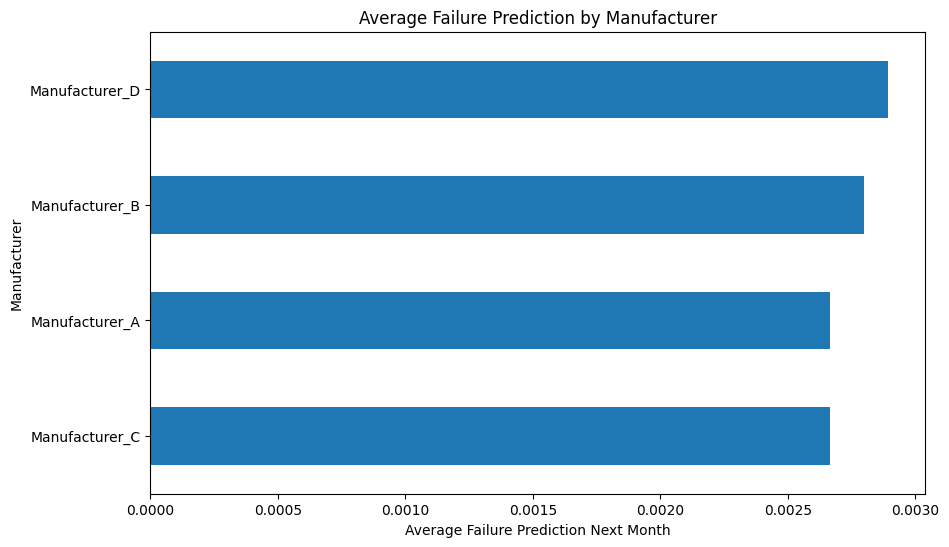

Average Failure Prediction by Floor: Floor
5    0.002025
2    0.002181
1    0.002487
4    0.003545
3    0.003662
Name: Predicted_Failure_Next_Month, dtype: float64


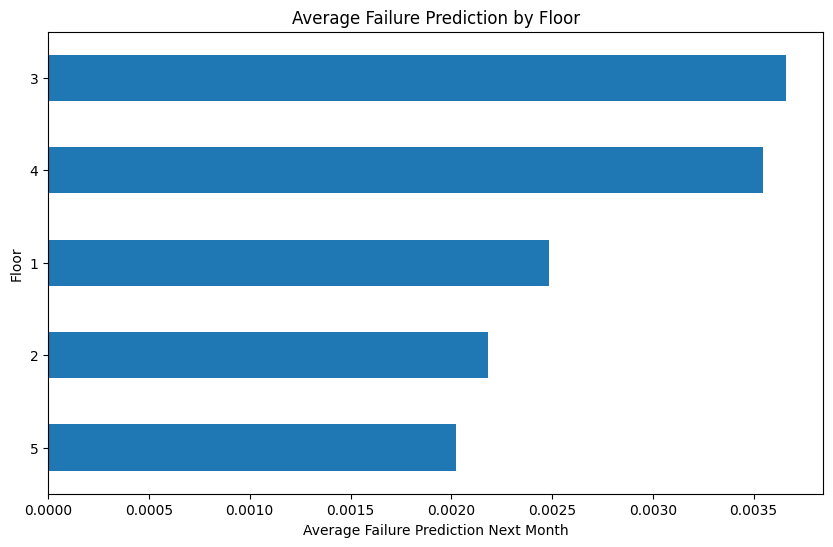

Number of Assets with Failure Probability >= 0.2: Asset Type
Elevator              82
Escalator             84
Information Board     92
Water Fountain        93
ATM                   97
Kiosk                 97
Vending Machine       97
Automatic Door       102
dtype: int64


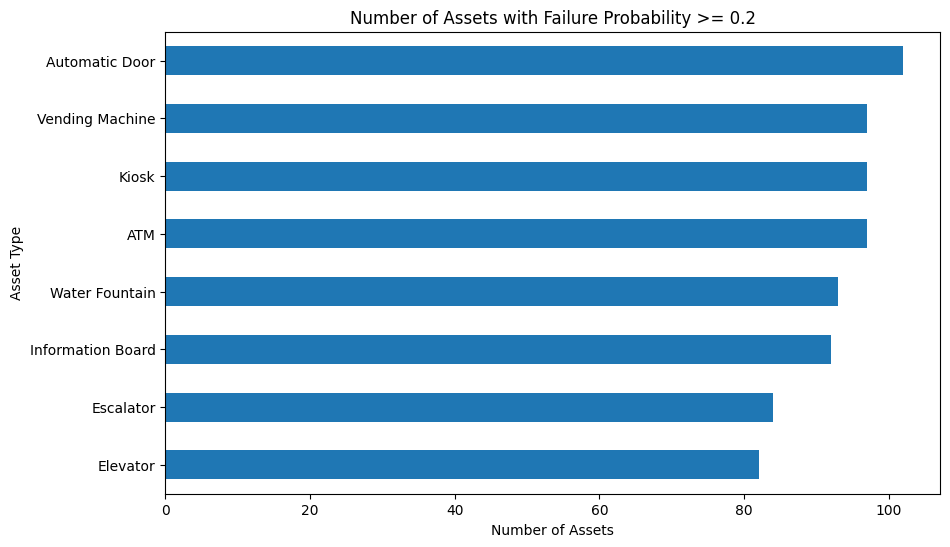

Number of Assets with Failure Probability >= 0.5: Asset Type
Escalator            45
Elevator             48
Information Board    54
ATM                  56
Automatic Door       57
Water Fountain       57
Kiosk                61
Vending Machine      70
dtype: int64


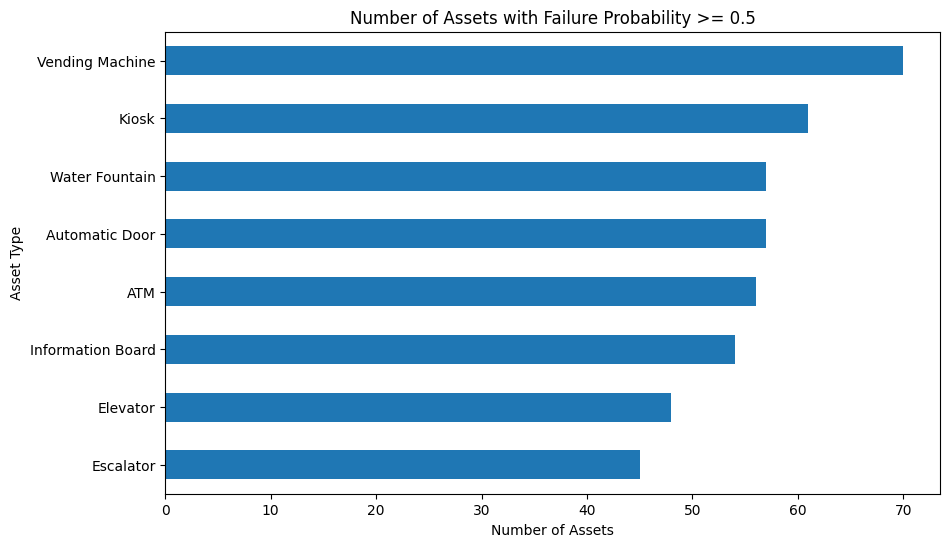

Number of Assets with Failure Probability >= 0.7: Asset Type
Escalator            26
Kiosk                29
Elevator             30
ATM                  33
Automatic Door       36
Information Board    38
Water Fountain       38
Vending Machine      47
dtype: int64


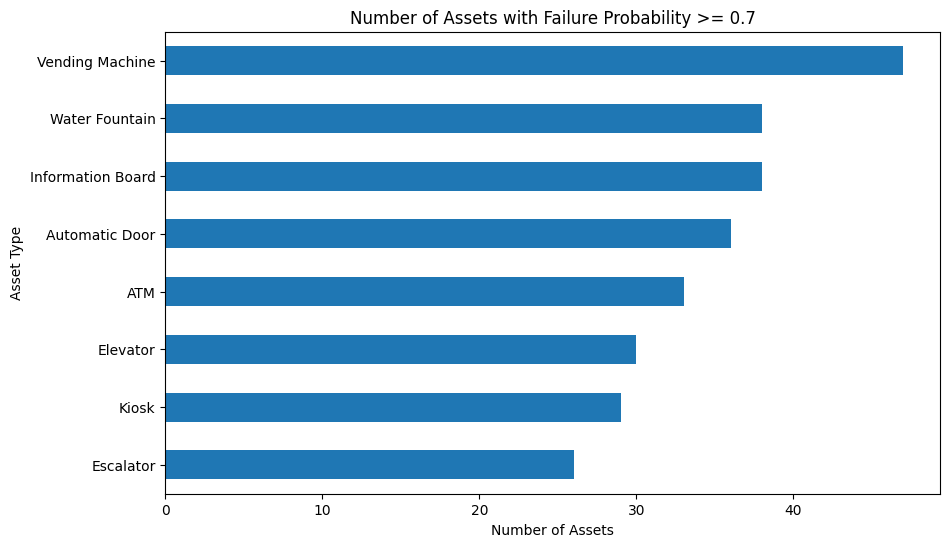

Number of Assets with Failure Probability >= 0.9: Asset Type
Elevator             23
Escalator            23
ATM                  25
Kiosk                25
Automatic Door       29
Water Fountain       29
Information Board    31
Vending Machine      36
dtype: int64


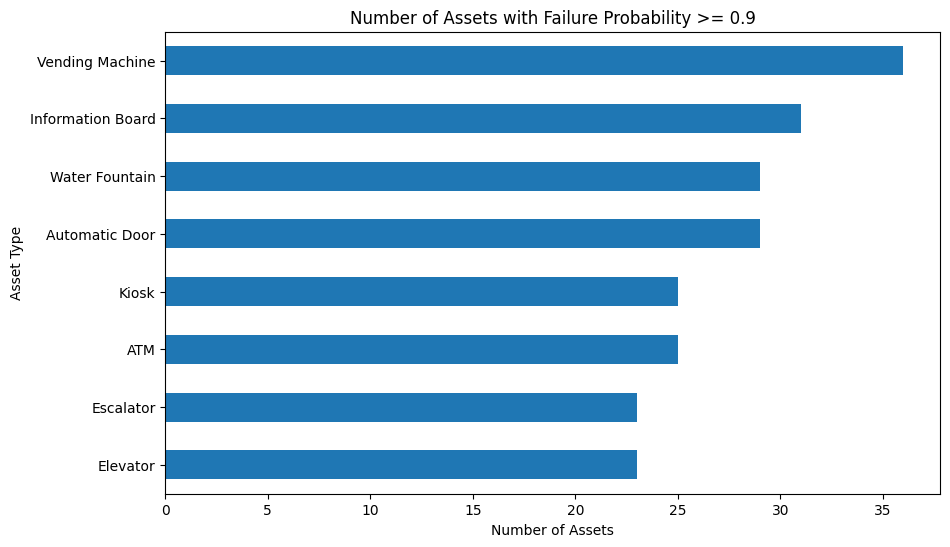

Number of Assets Installed Over Time: Installation Year
2018     49
2019    197
2020    217
2021    218
2022    190
2023    129
dtype: int64


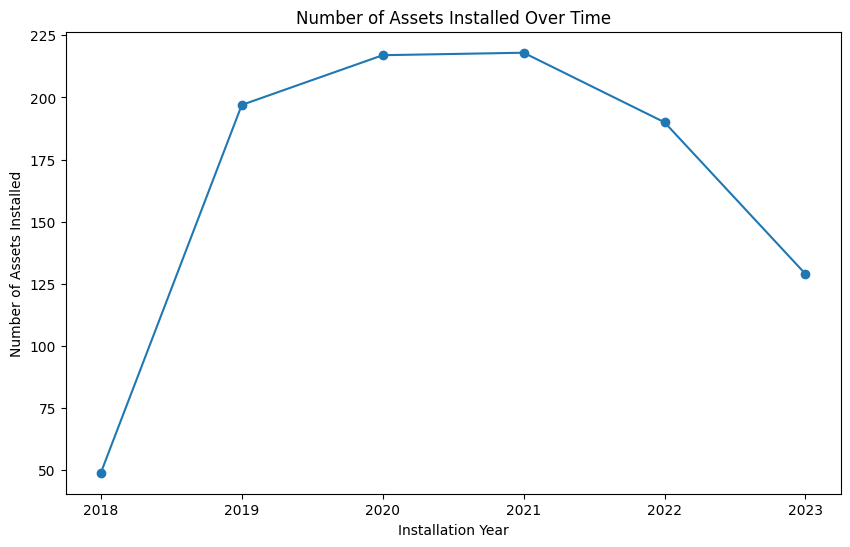

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mall_assets.csv')

# Mock calculation for Predicted_Failure_Next_Month and Failure_Probability
df['Predicted_Failure_Next_Month'] = df['Work Orders'] / df['Operational Time (hrs)']
df['Failure_Probability'] = df['Repairs'] / (df['Work Orders'] + 1)

# Convert dates to pandas datetime objects
df['Installation Date'] = pd.to_datetime(df['Installation Date'])
df['Last Serviced Date'] = pd.to_datetime(df['Last Serviced Date'])

# Failure analysis by Asset Type
plt.figure(figsize=(10, 6))
asset_type_failure = df.groupby('Asset Type')['Predicted_Failure_Next_Month'].mean().sort_values()
print("Average Failure Prediction by Asset Type:", asset_type_failure)
asset_type_failure.plot(kind='barh')
plt.xlabel('Average Failure Prediction Next Month')
plt.title('Average Failure Prediction by Asset Type')
plt.show()

# Failure analysis by Manufacturer
plt.figure(figsize=(10, 6))
manufacturer_failure = df.groupby('Manufacturer')['Predicted_Failure_Next_Month'].mean().sort_values()
print("Average Failure Prediction by Manufacturer:", manufacturer_failure)
manufacturer_failure.plot(kind='barh')
plt.xlabel('Average Failure Prediction Next Month')
plt.title('Average Failure Prediction by Manufacturer')
plt.show()

# Failure analysis by Floor
plt.figure(figsize=(10, 6))
floor_failure = df.groupby('Floor')['Predicted_Failure_Next_Month'].mean().sort_values()
print("Average Failure Prediction by Floor:", floor_failure)
floor_failure.plot(kind='barh')
plt.xlabel('Average Failure Prediction Next Month')
plt.title('Average Failure Prediction by Floor')
plt.show()

# Dynamic threshold analysis for Failure Probability
thresholds = [0.2, 0.5, 0.7, 0.9]
for threshold in thresholds:
    plt.figure(figsize=(10, 6))
    df_high_risk = df[df['Failure_Probability'] >= threshold]
    high_risk_assets = df_high_risk.groupby('Asset Type').size().sort_values()
    print(f"Number of Assets with Failure Probability >= {threshold}:", high_risk_assets)
    high_risk_assets.plot(kind='barh')
    plt.xlabel('Number of Assets')
    plt.title(f'Number of Assets with Failure Probability >= {threshold}')
    plt.show()

# Time analysis for installations and last service
plt.figure(figsize=(10, 6))
df['Installation Year'] = df['Installation Date'].dt.year
installation_by_year = df.groupby('Installation Year').size()
print("Number of Assets Installed Over Time:", installation_by_year)
installation_by_year.plot(kind='line', marker='o')
plt.xlabel('Installation Year')
plt.ylabel('Number of Assets Installed')
plt.title('Number of Assets Installed Over Time')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mall_assets_with_predictions.csv')

# Convert dates to pandas datetime objects
df['Installation Date'] = pd.to_datetime(df['Installation Date'])
df['Last Serviced Date'] = pd.to_datetime(df['Last Serviced Date'])

# Calculate an 'Urgency_Score' based on your criteria
df['Urgency_Score'] = df['Predicted_Failure_Next_Month'] * df['Failure_Probability']

# Display the Top 5 assets that need attention
top_5_assets = df.nlargest(5, 'Urgency_Score')
print("Top 5 Assets That Need Attention:")
print(top_5_assets[['Asset ID', 'Asset Type', 'Manufacturer', 'Floor', 'Urgency_Score']])


Top 5 Assets That Need Attention:
     Asset ID       Asset Type    Manufacturer  Floor  Urgency_Score
104       105         Elevator  Manufacturer_D      3            1.0
125       126         Elevator  Manufacturer_B      3            1.0
208       209  Vending Machine  Manufacturer_D      1            1.0
661       662  Vending Machine  Manufacturer_D      3            1.0
33         34            Kiosk  Manufacturer_A      4            1.0


In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('mall_assets_with_predictions.csv')

# Remove rows where Failure_Probability is higher than or equal to 1
filtered_df = df[df['Failure_Probability'] < 1]

# Save the filtered DataFrame back to a CSV file
filtered_df.to_csv('filtered_file.csv', index=False)
